In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
def prepare_file_paths(year, category):
    file_names = os.listdir(os.path.join('dataset_nyc_taxi', category, year))
    file_paths = [os.path.join('dataset_nyc_taxi', category, year, file_name) for file_name in file_names]
    return file_paths

In [5]:
months_in_years = {
    '2019' : range(1, 12),
    '2020' : range(12),
    '2021' : range(12),
    '2022' : range(12),
    '2023' : range(12),
}

number_to_month = {
    0: 'January',
    1: 'February',
    2: 'March',
    3: 'April',
    4: 'May',
    5: 'June',
    6: 'July',
    7: 'August',
    8: 'September',
    9: 'October',
    10: 'November',
    11: 'December'
}

In [6]:
categories = ['fhv', 'green', 'yellow']
years = ['2019', '2020', '2021', '2022', '2023']

In [7]:
prepare_file_paths('2020', 'fhv')

['dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-02.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-03.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-10.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-09.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-12.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-04.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-06.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-07.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-05.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-11.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-01.parquet',
 'dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-08.parquet']

In [29]:
month_df = pd.read_parquet('dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-01.parquet')
month_df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02864,B02864,2020-01-01 00:40:13,2020-01-01 00:43:34,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,1.93,...,2.70,2.75,NaN,0.0,18.25,N,N,,N,N
1,HV0003,B02682,B02682,2020-01-01 00:42:31,2020-01-01 00:46:33,2020-01-01 00:47:50,2020-01-01 00:53:23,114,79,0.81,...,1.31,2.75,NaN,0.0,10.84,N,N,,N,N
2,HV0003,B02764,B02764,2020-01-01 00:01:42,2020-01-01 00:02:06,2020-01-01 00:04:37,2020-01-01 00:21:49,4,125,2.53,...,1.39,2.75,NaN,3.0,11.73,N,N,,N,N
3,HV0003,B02764,B02764,2020-01-01 00:21:23,2020-01-01 00:26:02,2020-01-01 00:26:36,2020-01-01 00:33:00,231,113,1.11,...,0.75,2.75,NaN,0.0,5.84,N,N,,N,N
4,HV0003,B02764,B02764,2020-01-01 00:32:20,2020-01-01 00:37:06,2020-01-01 00:37:49,2020-01-01 00:46:59,114,144,1.10,...,1.03,2.75,NaN,0.0,7.69,N,N,,N,N


In [30]:
month_df.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,20569368,14587225,20569368,20569368,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,43.0,2.056937e+07,2.056937e+07
mean,2020-01-17 01:15:47.482218,2020-01-17 00:16:01.454098,2020-01-17 01:20:09.866663,2020-01-17 01:37:30.302955,1.393353e+02,1.418391e+02,4.556780e+00,1.040438e+03,1.701709e+01,8.423652e-01,4.402388e-01,1.405656e+00,9.744287e-01,0.0,6.074975e-01,1.311404e+01
min,2019-12-31 22:59:17,2019-12-31 23:46:18,2020-01-01 00:00:00,2020-01-01 00:01:17,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.277800e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-1.517200e+02
25%,2020-01-09 17:07:10,2020-01-09 15:16:21,2020-01-09 17:11:32,2020-01-09 17:31:10,7.500000e+01,7.500000e+01,1.483000e+00,5.470000e+02,7.720000e+00,0.000000e+00,1.800000e-01,6.400000e-01,0.000000e+00,0.0,0.000000e+00,5.600000e+00
50%,2020-01-17 11:37:08,2020-01-17 09:38:43,2020-01-17 11:41:21,2020-01-17 11:59:11,1.400000e+02,1.420000e+02,2.710000e+00,8.600000e+02,1.199000e+01,0.000000e+00,2.900000e-01,1.000000e+00,0.000000e+00,0.0,0.000000e+00,9.610000e+00
75%,2020-01-24 19:35:46,2020-01-24 19:36:37,2020-01-24 19:40:04,2020-01-24 19:57:17,2.110000e+02,2.180000e+02,5.478000e+00,1.334000e+03,2.029000e+01,0.000000e+00,5.200000e-01,1.710000e+00,2.750000e+00,0.0,0.000000e+00,1.656000e+01
max,2020-01-31 23:59:28,2020-02-01 00:02:16,2020-01-31 23:59:59,2020-02-01 04:05:40,2.650000e+02,2.650000e+02,3.395500e+02,5.048900e+04,1.461660e+03,1.187200e+02,3.707000e+01,7.202000e+01,8.250000e+00,0.0,1.000000e+02,1.054270e+03
std,NaN,NaN,NaN,NaN,7.518385e+01,7.767920e+01,5.415823e+00,7.094020e+02,1.611271e+01,3.417818e+00,4.736847e-01,1.309837e+00,1.261104e+00,0.0,2.186553e+00,1.281221e+01


In [31]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20569368 entries, 0 to 20569367
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [32]:
weather_df = pd.read_csv('dataset_nyc_taxi/open-meteo-nyc-2019-2023.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day ()
0,2019-02-01 00:00:00,-10.4,30,-24.6,-16.1,0.0,0.0,0.0,0.01,1023.6,0,12.1,0
1,2019-02-01 01:00:00,-10.4,30,-24.7,-16.1,0.0,0.0,0.0,0.01,1023.5,1,12.2,0
2,2019-02-01 02:00:00,-10.5,29,-25.1,-16.3,0.0,0.0,0.0,0.01,1023.9,0,12.6,0
3,2019-02-01 03:00:00,-10.8,30,-25.0,-16.5,0.0,0.0,0.0,0.01,1023.9,0,12.2,0
4,2019-02-01 04:00:00,-11.0,31,-24.7,-17.0,0.0,0.0,0.0,0.01,1024.3,2,13.5,0


In [33]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43080 entries, 0 to 43079
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       43080 non-null  datetime64[ns]
 1   temperature_2m (°C)        43080 non-null  float64       
 2   relative_humidity_2m (%)   43080 non-null  int64         
 3   dew_point_2m (°C)          43080 non-null  float64       
 4   apparent_temperature (°C)  43080 non-null  float64       
 5   precipitation (mm)         43080 non-null  float64       
 6   rain (mm)                  43080 non-null  float64       
 7   snowfall (cm)              43080 non-null  float64       
 8   snow_depth (m)             43080 non-null  float64       
 9   surface_pressure (hPa)     43080 non-null  float64       
 10  cloud_cover (%)            43080 non-null  int64         
 11  wind_speed_10m (km/h)      43080 non-null  float64       
 12  is_d

In [34]:
oil_df = pd.read_csv('dataset_nyc_taxi/oil_prices.csv')
oil_df['date'] = pd.to_datetime(oil_df['date'])
oil_df

,date,retail_price
0,2018-12-31,3.110
1,2019-01-07,3.069
2,2019-01-14,3.049
3,2019-01-21,3.037
4,2019-01-28,3.050
...,...,...
257,2023-12-04,4.139
258,2023-12-11,4.050
259,2023-12-18,3.969
260,2023-12-25,4.022


In [35]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          262 non-null    datetime64[ns]
 1   retail_price  262 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [36]:
pd.read_csv('dataset_nyc_taxi/samples_num_monthly.csv')

,Unnamed: 0,2019 february,2019 march,2019 april,2019 may,2019 june,2019 july,2019 august,2019 september,2019 october,...,2023 march,2023 april,2023 may,2023 june,2023 july,2023 august,2023 september,2023 october,2023 november,2023 december
0,fhv,20159102,23864598,21734822,22329247,21001990,20303312,20126113,20069321,21162290,...,20413539,19144903,19847676,19366619,19132131,18322150,19851123,20186330,19269250,20516297
1,green,615594,643063,567852,545452,506238,470743,449695,449063,476386,...,72044,65392,69174,65550,61343,60649,65471,66177,64025,64215
2,yellow,7049370,7866620,7475949,7598445,6971560,6310419,6073357,6567788,7213891,...,3403766,3288250,3513649,3307234,2907108,2824209,2846722,3522285,3339715,3376567


In [37]:
from tqdm import tqdm

tqdm.pandas()

In [38]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=False, nb_workers=16)

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [39]:
N = 1000
rs = 42

def get_samples_month_by_month(vechicle_type, oil_df, weather_df):
    dfs_to_concat = []
    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in tqdm(range(len(filepaths)), total=len(filepaths), desc=str(year)):
            month_df = pd.read_parquet(filepaths[i])
            choosen_df = month_df[month_df['payment_type'] == 1].sample(N, random_state=rs).copy()
            
            choosen_df['nearest_date'] = choosen_df['lpep_pickup_datetime'].parallel_apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
            merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
            merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])
            
            merged_oil_df['nearest_date'] = merged_oil_df['lpep_pickup_datetime'].parallel_apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
            merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
            merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
       
            dfs_to_concat.append(merged_oil_weather_df)
    
    samples_df = pd.concat(dfs_to_concat, ignore_index=True)
            
    return samples_df

In [40]:
choosen_df = get_samples_month_by_month('green', oil_df, weather_df)
choosen_df

2023: 100%|██████████| 12/12 [01:12<00:00,  6.08s/it]
/tmp/ipykernel_38919/756660734.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  samples_df = pd.concat(dfs_to_concat, ignore_index=True)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day ()
0,2,2019-07-22 08:03:41,2019-07-22 08:10:15,N,1.0,74,168,2.0,1.37,6.5,...,24.0,31.9,0.0,0.0,0.0,0.0,1005.0,40,7.1,1
1,2,2019-07-11 06:56:09,2019-07-11 07:09:38,N,1.0,145,129,2.0,6.18,18.5,...,19.0,25.6,0.0,0.0,0.0,0.0,1009.2,26,4.7,1
2,2,2019-07-19 16:06:07,2019-07-19 17:21:48,N,1.0,197,65,1.0,17.25,60.5,...,24.7,36.9,0.0,0.0,0.0,0.0,1004.3,29,14.6,1
3,2,2019-07-19 02:45:29,2019-07-19 02:53:49,N,1.0,97,61,1.0,1.57,8.0,...,21.0,25.6,0.0,0.0,0.0,0.0,1005.9,100,4.0,0
4,2,2019-07-15 18:38:47,2019-07-15 18:53:36,N,1.0,82,226,1.0,2.93,13.0,...,17.8,29.4,0.0,0.0,0.0,0.0,1009.6,30,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,2,2023-07-15 01:23:17,2023-07-15 01:27:29,N,1.0,134,134,1.0,0.91,6.5,...,21.0,23.5,1.3,1.3,0.0,0.0,1008.3,100,15.4,0
58996,2,2023-07-19 10:56:05,2023-07-19 11:08:01,N,1.0,41,239,1.0,2.57,14.9,...,19.9,28.2,0.1,0.1,0.0,0.0,1011.5,91,3.4,1
58997,2,2023-07-29 20:09:18,2023-07-29 20:14:21,N,1.0,75,263,1.0,1.09,7.9,...,20.0,29.4,2.0,2.0,0.0,0.0,998.7,38,22.5,1
58998,2,2023-07-10 10:54:27,2023-07-10 11:14:20,N,1.0,74,262,1.0,2.68,19.1,...,20.3,26.7,0.0,0.0,0.0,0.0,1002.3,89,16.2,1


In [ ]:
choosen_df['nearest_date'] = choosen_df['lpep_pickup_datetime'].apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])
merged_oil_df

In [ ]:
merged_oil_df['nearest_date'] = merged_oil_df['lpep_pickup_datetime'].apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
merged_oil_weather_df

In [41]:
choosen_df.isna().sum()

VendorID                         0
lpep_pickup_datetime             0
lpep_dropoff_datetime            0
store_and_fwd_flag               0
RatecodeID                       0
PULocationID                     0
DOLocationID                     0
passenger_count                  0
trip_distance                    0
fare_amount                      0
extra                            0
mta_tax                          0
tip_amount                       0
tolls_amount                     0
ehail_fee                    58996
improvement_surcharge            0
total_amount                     0
payment_type                     0
trip_type                        5
congestion_surcharge             0
retail_price                     0
temperature_2m (°C)              0
relative_humidity_2m (%)         0
dew_point_2m (°C)                0
apparent_temperature (°C)        0
precipitation (mm)               0
rain (mm)                        0
snowfall (cm)                    0
snow_depth (m)      

In [42]:
choosen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   VendorID                   59000 non-null  int64         
 1   lpep_pickup_datetime       59000 non-null  datetime64[us]
 2   lpep_dropoff_datetime      59000 non-null  datetime64[us]
 3   store_and_fwd_flag         59000 non-null  object        
 4   RatecodeID                 59000 non-null  float64       
 5   PULocationID               59000 non-null  int64         
 6   DOLocationID               59000 non-null  int64         
 7   passenger_count            59000 non-null  float64       
 8   trip_distance              59000 non-null  float64       
 9   fare_amount                59000 non-null  float64       
 10  extra                      59000 non-null  float64       
 11  mta_tax                    59000 non-null  float64       
 12  tip_

In [52]:
choosen_df["store_and_fwd_flag"] = choosen_df["store_and_fwd_flag"].map({'N':0, 'Y':1})

In [68]:
import geopandas as gpd

shapefile = gpd.read_file("../taxi_zones")

location_to_borough_mapping = dict(zip(shapefile['LocationID'], shapefile['borough']))
location_to_borough_idx_mapping = dict(zip(shapefile['LocationID'], shapefile['borough'].map({'Manhattan': 0, 'Queens': 1, 'Brooklyn': 2, 'Bronx': 3, 'EWR': 4, 'Staten Island': 5})))

choosen_df["PULocationBorough"] = choosen_df.PULocationID.map(location_to_borough_idx_mapping)
choosen_df["DOLocationBorough"] = choosen_df.DOLocationID.map(location_to_borough_idx_mapping)

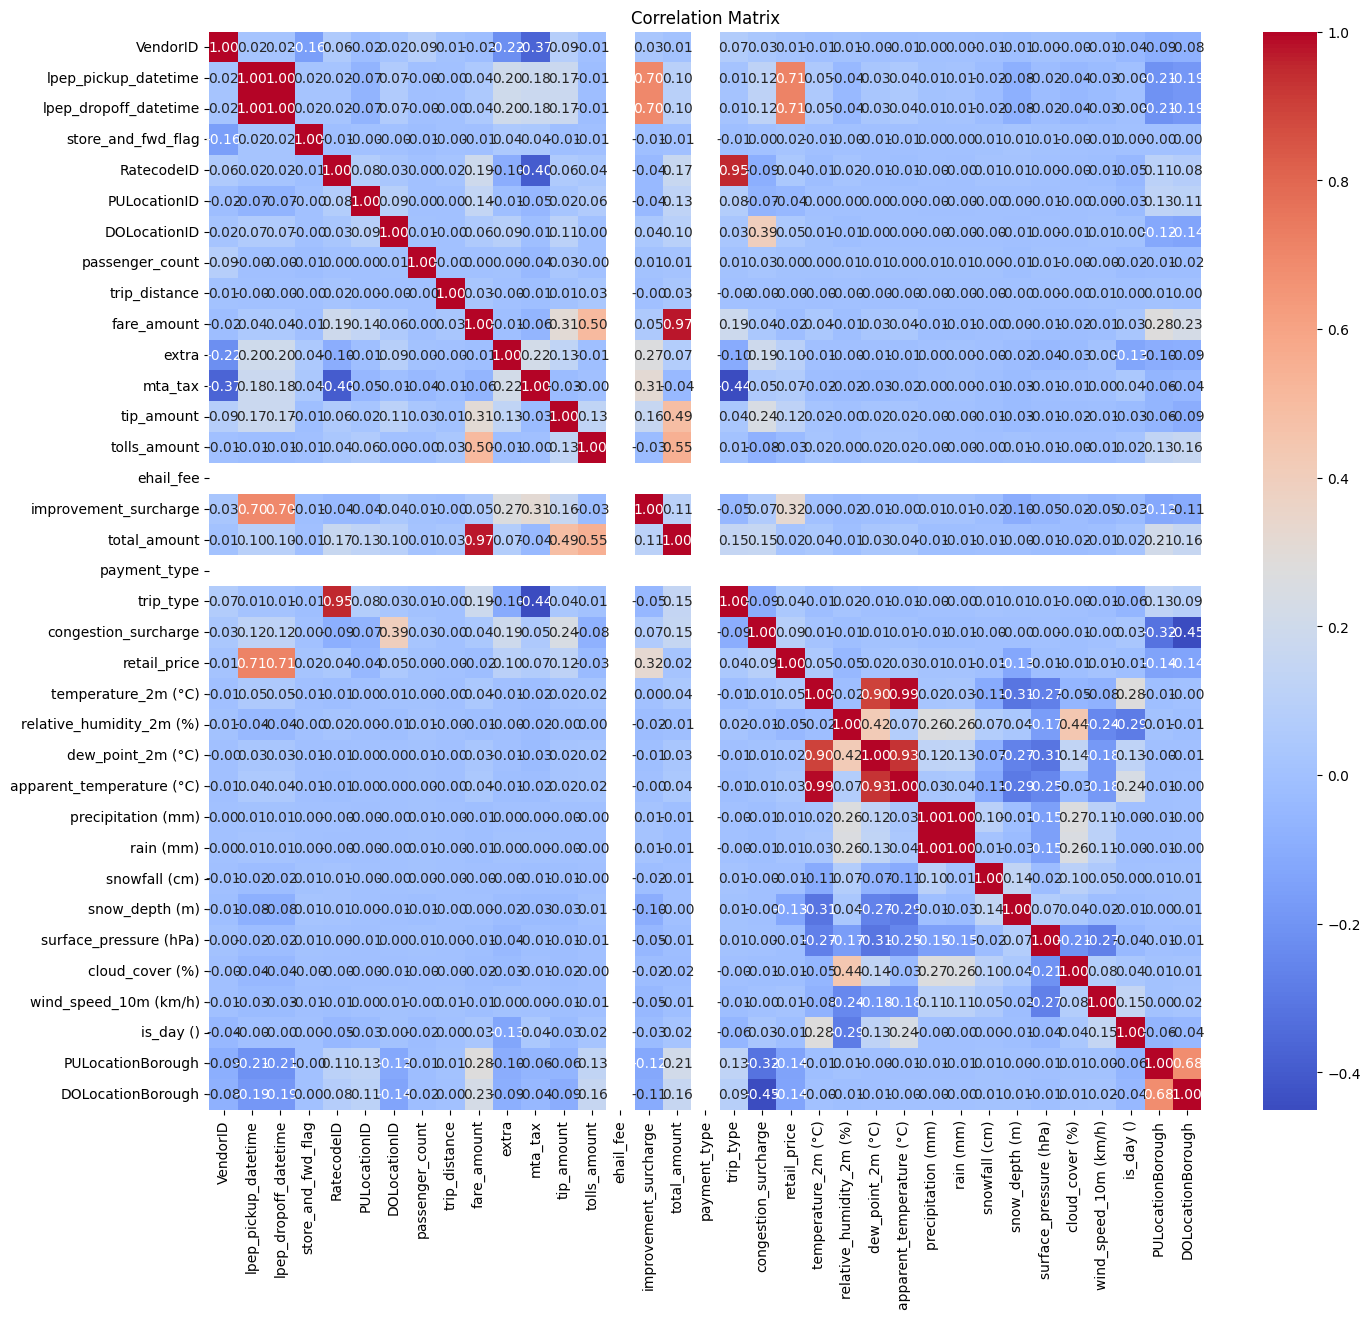

In [69]:
correlation_matrix = choosen_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [70]:
choosen_df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'retail_price', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'is_day ()', 'PULocationBorough', 'DOLocationBorough'],
      dtype='object')

In [ ]:
! pip install missingno

<Axes: >

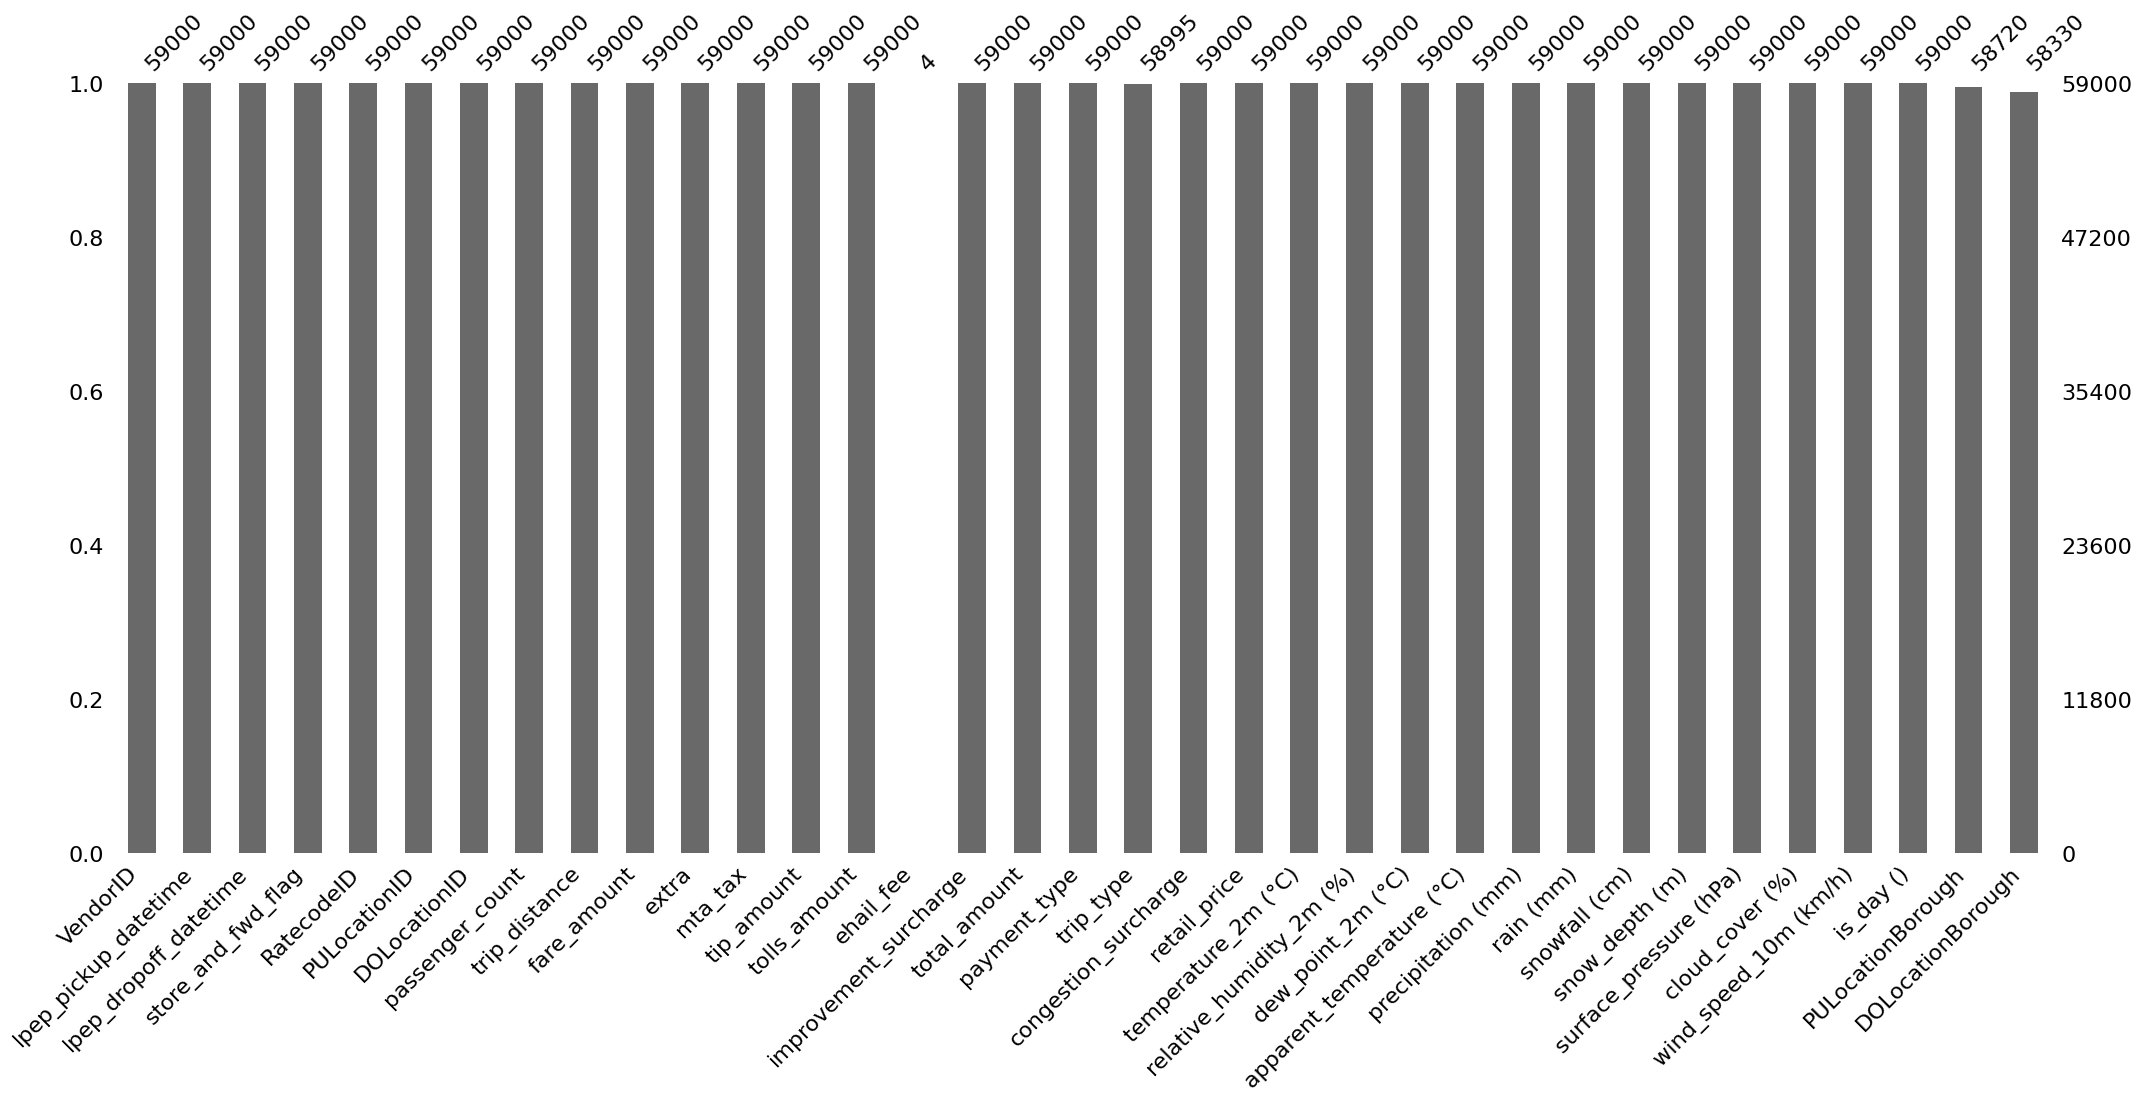

In [71]:
import missingno as msno

msno.bar(choosen_df)

In [72]:
green_sample_df = choosen_df[['tip_amount', 'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
       'tolls_amount', 'improvement_surcharge',
       'total_amount', 'trip_type', 'congestion_surcharge',
       'retail_price', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'apparent_temperature (°C)', 'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'is_day ()', 'PULocationBorough', 'DOLocationBorough']]

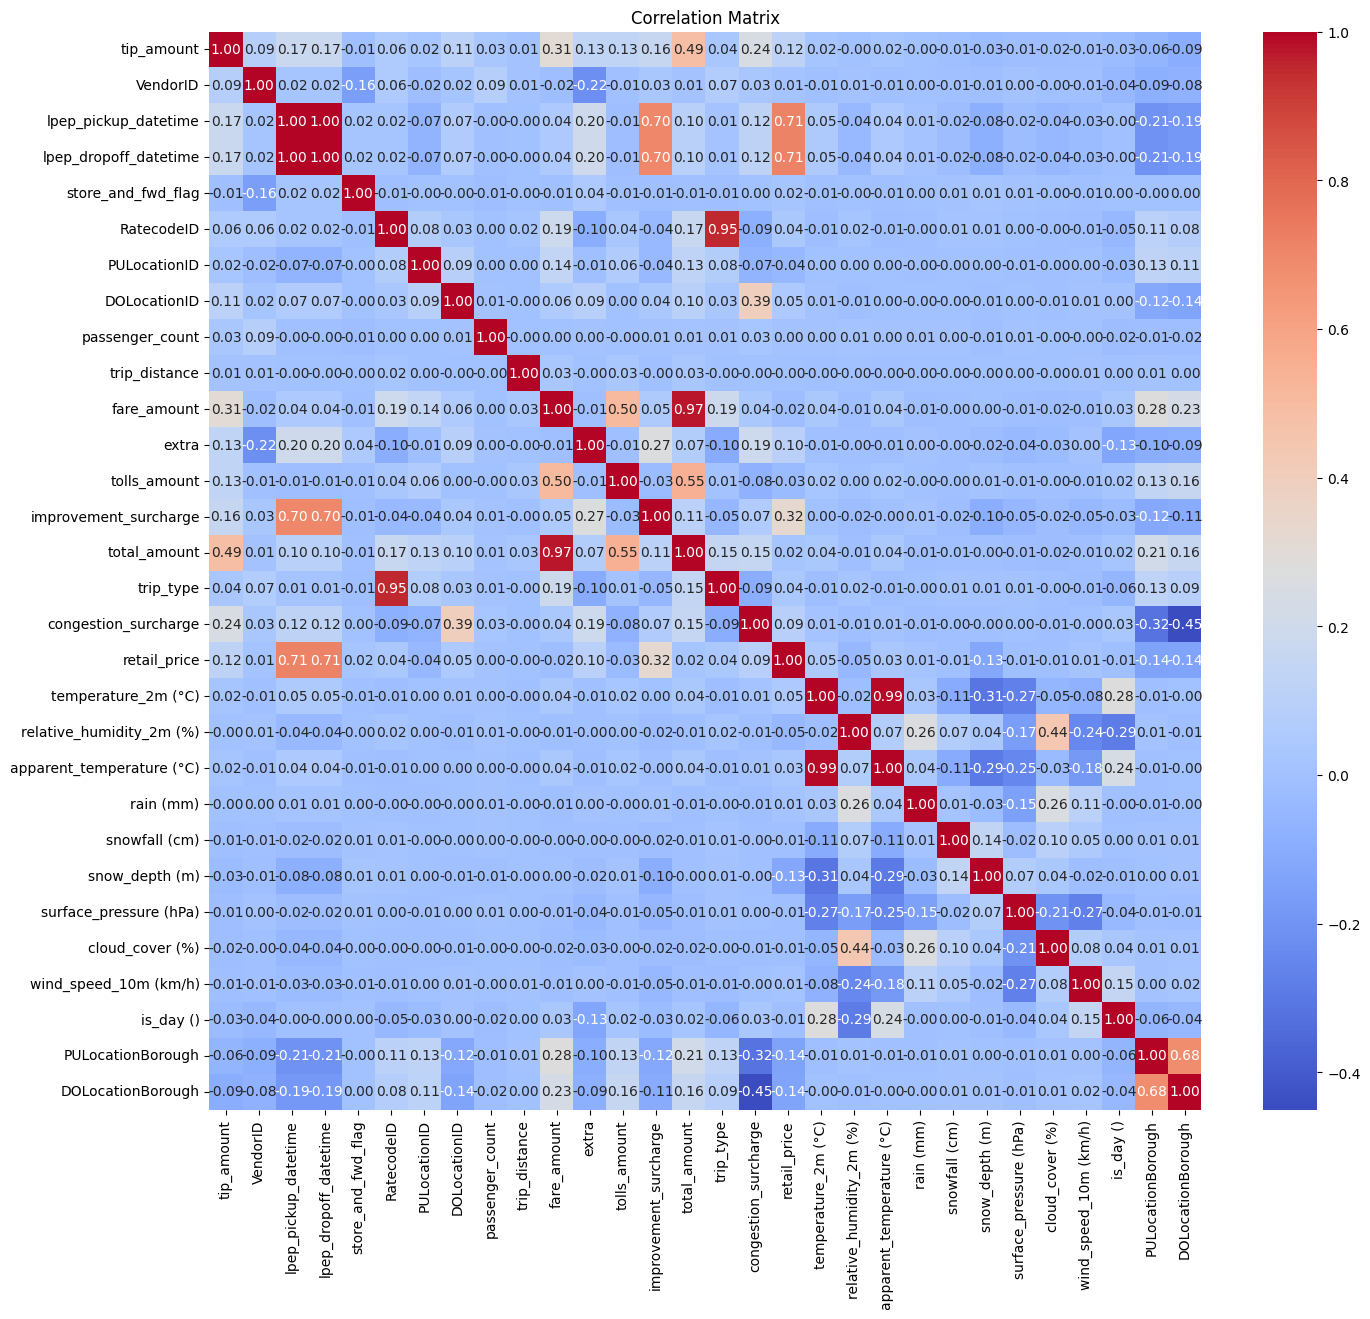

In [73]:
correlation_matrix = green_sample_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [75]:
green_sample_df['year'] = green_sample_df['lpep_pickup_datetime'].dt.year
green_sample_df['month'] = green_sample_df['lpep_pickup_datetime'].dt.month
green_sample_df['weekday'] = green_sample_df['lpep_pickup_datetime'].dt.weekday
green_sample_df['hour'] = green_sample_df['lpep_pickup_datetime'].dt.hour
green_sample_df

/tmp/ipykernel_38919/139812122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_sample_df['year'] = green_sample_df['lpep_pickup_datetime'].dt.year
/tmp/ipykernel_38919/139812122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_sample_df['month'] = green_sample_df['lpep_pickup_datetime'].dt.month
/tmp/ipykernel_38919/139812122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,tip_amount,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day (),PULocationBorough,DOLocationBorough,year,month,weekday,hour
0,2.19,2,2019-07-22 08:03:41,2019-07-22 08:10:15,0,1.0,74,168,2.0,1.37,...,1005.0,40,7.1,1,0.0,3.0,2019,7,0,8
1,4.82,2,2019-07-11 06:56:09,2019-07-11 07:09:38,0,1.0,145,129,2.0,6.18,...,1009.2,26,4.7,1,1.0,1.0,2019,7,3,6
2,0.00,2,2019-07-19 16:06:07,2019-07-19 17:21:48,0,1.0,197,65,1.0,17.25,...,1004.3,29,14.6,1,1.0,2.0,2019,7,4,16
3,1.86,2,2019-07-19 02:45:29,2019-07-19 02:53:49,0,1.0,97,61,1.0,1.57,...,1005.9,100,4.0,0,2.0,2.0,2019,7,4,2
4,2.20,2,2019-07-15 18:38:47,2019-07-15 18:53:36,0,1.0,82,226,1.0,2.93,...,1009.6,30,6.0,1,1.0,1.0,2019,7,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,1.80,2,2023-07-15 01:23:17,2023-07-15 01:27:29,0,1.0,134,134,1.0,0.91,...,1008.3,100,15.4,0,1.0,1.0,2023,7,5,1
58996,3.83,2,2023-07-19 10:56:05,2023-07-19 11:08:01,0,1.0,41,239,1.0,2.57,...,1011.5,91,3.4,1,0.0,0.0,2023,7,2,10
58997,3.29,2,2023-07-29 20:09:18,2023-07-29 20:14:21,0,1.0,75,263,1.0,1.09,...,998.7,38,22.5,1,0.0,0.0,2023,7,5,20
58998,4.53,2,2023-07-10 10:54:27,2023-07-10 11:14:20,0,1.0,74,262,1.0,2.68,...,1002.3,89,16.2,1,0.0,0.0,2023,7,0,10


In [76]:
green_sample_df['trip_time'] = green_sample_df['lpep_dropoff_datetime'] - green_sample_df['lpep_pickup_datetime'] 
green_sample_df

,tip_amount,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,cloud_cover (%),wind_speed_10m (km/h),is_day (),PULocationBorough,DOLocationBorough,year,month,weekday,hour,trip_time
0,2.19,2,2019-07-22 08:03:41,2019-07-22 08:10:15,0,1.0,74,168,2.0,1.37,...,40,7.1,1,0.0,3.0,2019,7,0,8,0 days 00:06:34
1,4.82,2,2019-07-11 06:56:09,2019-07-11 07:09:38,0,1.0,145,129,2.0,6.18,...,26,4.7,1,1.0,1.0,2019,7,3,6,0 days 00:13:29
2,0.00,2,2019-07-19 16:06:07,2019-07-19 17:21:48,0,1.0,197,65,1.0,17.25,...,29,14.6,1,1.0,2.0,2019,7,4,16,0 days 01:15:41
3,1.86,2,2019-07-19 02:45:29,2019-07-19 02:53:49,0,1.0,97,61,1.0,1.57,...,100,4.0,0,2.0,2.0,2019,7,4,2,0 days 00:08:20
4,2.20,2,2019-07-15 18:38:47,2019-07-15 18:53:36,0,1.0,82,226,1.0,2.93,...,30,6.0,1,1.0,1.0,2019,7,0,18,0 days 00:14:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,1.80,2,2023-07-15 01:23:17,2023-07-15 01:27:29,0,1.0,134,134,1.0,0.91,...,100,15.4,0,1.0,1.0,2023,7,5,1,0 days 00:04:12
58996,3.83,2,2023-07-19 10:56:05,2023-07-19 11:08:01,0,1.0,41,239,1.0,2.57,...,91,3.4,1,0.0,0.0,2023,7,2,10,0 days 00:11:56
58997,3.29,2,2023-07-29 20:09:18,2023-07-29 20:14:21,0,1.0,75,263,1.0,1.09,...,38,22.5,1,0.0,0.0,2023,7,5,20,0 days 00:05:03
58998,4.53,2,2023-07-10 10:54:27,2023-07-10 11:14:20,0,1.0,74,262,1.0,2.68,...,89,16.2,1,0.0,0.0,2023,7,0,10,0 days 00:19:53


In [77]:
def timedelta_to_seconds(td):
    return td.total_seconds()

green_sample_df['trip_time'] = green_sample_df['trip_time'].apply(timedelta_to_seconds)
green_sample_df

,tip_amount,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,cloud_cover (%),wind_speed_10m (km/h),is_day (),PULocationBorough,DOLocationBorough,year,month,weekday,hour,trip_time
0,2.19,2,2019-07-22 08:03:41,2019-07-22 08:10:15,0,1.0,74,168,2.0,1.37,...,40,7.1,1,0.0,3.0,2019,7,0,8,394.0
1,4.82,2,2019-07-11 06:56:09,2019-07-11 07:09:38,0,1.0,145,129,2.0,6.18,...,26,4.7,1,1.0,1.0,2019,7,3,6,809.0
2,0.00,2,2019-07-19 16:06:07,2019-07-19 17:21:48,0,1.0,197,65,1.0,17.25,...,29,14.6,1,1.0,2.0,2019,7,4,16,4541.0
3,1.86,2,2019-07-19 02:45:29,2019-07-19 02:53:49,0,1.0,97,61,1.0,1.57,...,100,4.0,0,2.0,2.0,2019,7,4,2,500.0
4,2.20,2,2019-07-15 18:38:47,2019-07-15 18:53:36,0,1.0,82,226,1.0,2.93,...,30,6.0,1,1.0,1.0,2019,7,0,18,889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,1.80,2,2023-07-15 01:23:17,2023-07-15 01:27:29,0,1.0,134,134,1.0,0.91,...,100,15.4,0,1.0,1.0,2023,7,5,1,252.0
58996,3.83,2,2023-07-19 10:56:05,2023-07-19 11:08:01,0,1.0,41,239,1.0,2.57,...,91,3.4,1,0.0,0.0,2023,7,2,10,716.0
58997,3.29,2,2023-07-29 20:09:18,2023-07-29 20:14:21,0,1.0,75,263,1.0,1.09,...,38,22.5,1,0.0,0.0,2023,7,5,20,303.0
58998,4.53,2,2023-07-10 10:54:27,2023-07-10 11:14:20,0,1.0,74,262,1.0,2.68,...,89,16.2,1,0.0,0.0,2023,7,0,10,1193.0


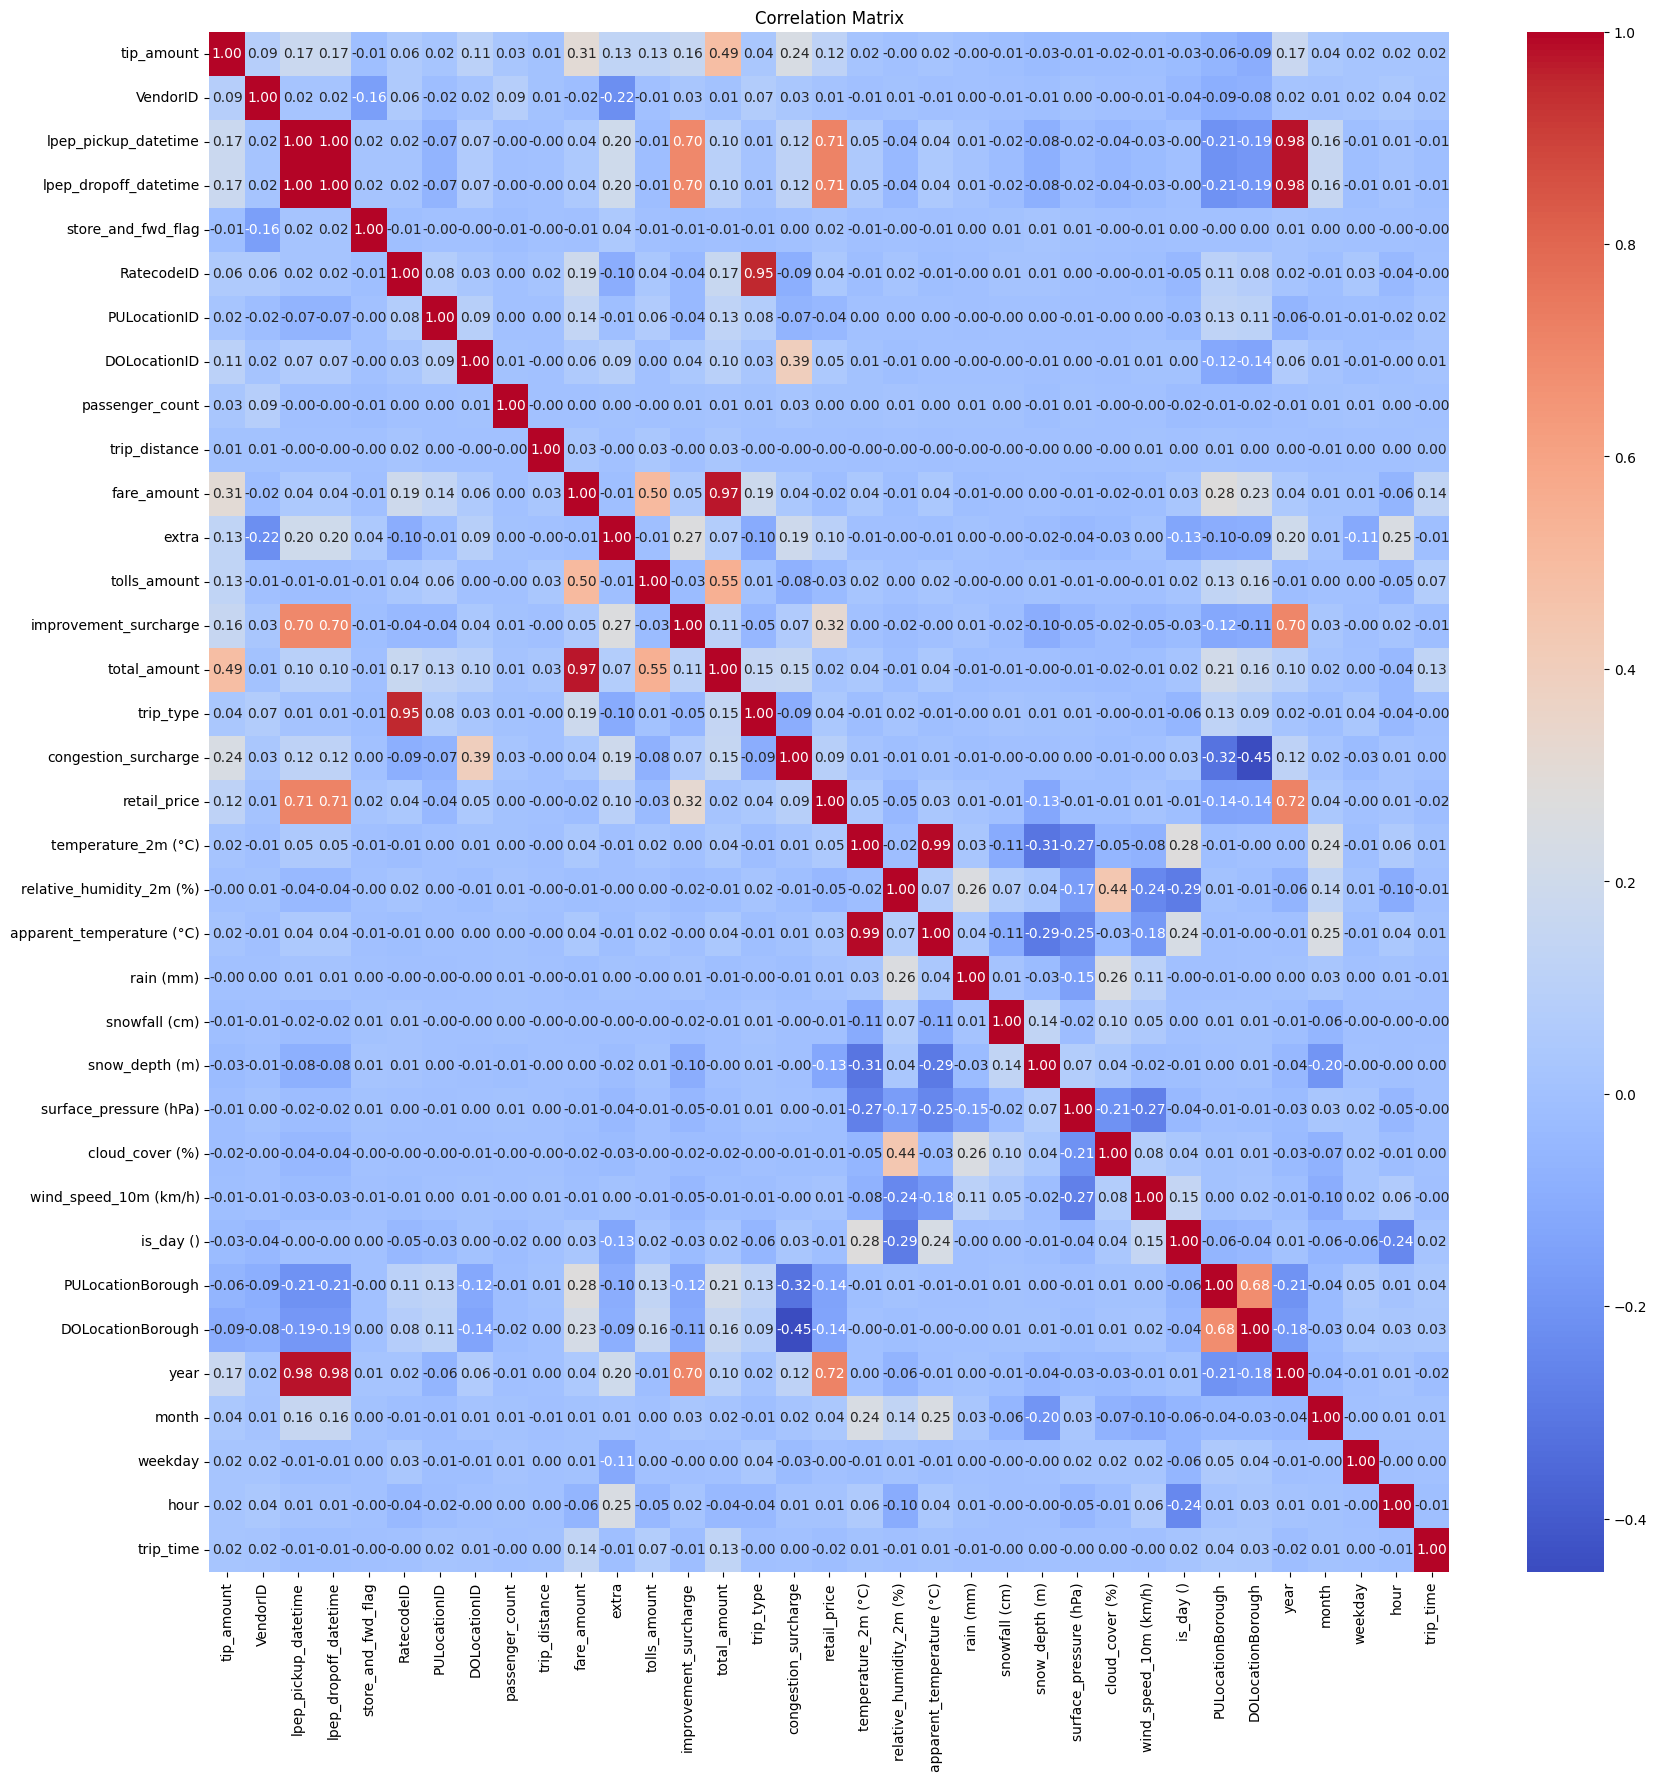

In [82]:
correlation_matrix = green_sample_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [83]:
N = 1000
rs = 42

def get_samples_month_by_month_yellow(vechicle_type, oil_df, weather_df):
    dfs_to_concat = []
    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in tqdm(range(len(filepaths)), total=len(filepaths), desc=str(year)):
            month_df = pd.read_parquet(filepaths[i])
            choosen_df = month_df[month_df['payment_type'] == 1].sample(N, random_state=rs).copy()
            
            choosen_df['nearest_date'] = choosen_df['tpep_pickup_datetime'].parallel_apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
            merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
            merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])
            
            merged_oil_df['nearest_date'] = merged_oil_df['tpep_pickup_datetime'].parallel_apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
            merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
            merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
       
            dfs_to_concat.append(merged_oil_weather_df)
    
    samples_df = pd.concat(dfs_to_concat, ignore_index=True)
            
    return samples_df

In [84]:
choosen_df = get_samples_month_by_month_yellow('yellow', oil_df, weather_df)
choosen_df

2023: 100%|██████████| 12/12 [01:38<00:00,  8.22s/it]
/tmp/ipykernel_38919/4138520850.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  samples_df = pd.concat(dfs_to_concat, ignore_index=True)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day (),Airport_fee
0,1,2019-11-27 16:55:47,2019-11-27 17:12:14,1.0,1.60,1.0,N,43,170,1,...,8.5,0.0,0.0,0.0,0.0,997.7,35,21.4,1,NaN
1,1,2019-11-11 11:09:33,2019-11-11 11:24:39,0.0,2.10,1.0,N,43,262,1,...,8.4,0.0,0.0,0.0,0.0,1012.8,28,3.4,1,NaN
2,2,2019-11-24 13:31:49,2019-11-24 13:36:43,1.0,0.49,1.0,N,48,163,1,...,0.5,0.5,0.5,0.0,0.0,984.7,100,26.9,1,NaN
3,1,2019-11-15 23:48:04,2019-11-15 23:59:01,2.0,1.00,1.0,N,79,249,1,...,-1.2,0.0,0.0,0.0,0.0,1017.4,2,20.3,0,NaN
4,2,2019-11-09 07:05:56,2019-11-09 07:44:49,1.0,21.01,2.0,N,132,238,1,...,-7.3,0.0,0.0,0.0,0.0,1021.3,12,4.6,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,1,2023-07-15 18:56:53,2023-07-15 18:59:33,2.0,0.40,1.0,N,90,90,1,...,29.9,0.0,0.0,0.0,0.0,1006.1,44,15.5,1,0.0
58996,2,2023-07-07 12:02:57,2023-07-07 12:08:59,1.0,0.94,1.0,N,107,164,1,...,34.3,0.0,0.0,0.0,0.0,1005.4,15,8.7,1,0.0
58997,2,2023-07-27 08:34:14,2023-07-27 08:52:10,6.0,3.87,1.0,N,249,141,1,...,30.2,0.0,0.0,0.0,0.0,1009.0,47,18.8,1,0.0
58998,2,2023-07-21 14:21:28,2023-07-21 14:32:50,4.0,0.72,1.0,N,162,237,1,...,31.5,0.1,0.1,0.0,0.0,1000.7,23,15.6,1,0.0


In [85]:
choosen_df["store_and_fwd_flag"] = choosen_df["store_and_fwd_flag"].map({'N':0, 'Y':1})

In [86]:
import geopandas as gpd

shapefile = gpd.read_file("../taxi_zones")

location_to_borough_mapping = dict(zip(shapefile['LocationID'], shapefile['borough']))
location_to_borough_idx_mapping = dict(zip(shapefile['LocationID'], shapefile['borough'].map({'Manhattan': 0, 'Queens': 1, 'Brooklyn': 2, 'Bronx': 3, 'EWR': 4, 'Staten Island': 5})))

choosen_df["PULocationBorough"] = choosen_df.PULocationID.map(location_to_borough_idx_mapping)
choosen_df["DOLocationBorough"] = choosen_df.DOLocationID.map(location_to_borough_idx_mapping)

In [87]:
choosen_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'Airport_fee',
       'PULocationBorough', 'DOLocationBorough'],
      dtype='object')

In [88]:
choosen_df['year'] = choosen_df['tpep_pickup_datetime'].dt.year
choosen_df['month'] = choosen_df['tpep_pickup_datetime'].dt.month
choosen_df['weekday'] = choosen_df['tpep_pickup_datetime'].dt.weekday
choosen_df['hour'] = choosen_df['tpep_pickup_datetime'].dt.hour

choosen_df['trip_time'] = choosen_df['tpep_dropoff_datetime'] - choosen_df['tpep_pickup_datetime'] 

def timedelta_to_seconds(td):
    return td.total_seconds()

choosen_df['trip_time'] = choosen_df['trip_time'].apply(timedelta_to_seconds)
choosen_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,wind_speed_10m (km/h),is_day (),Airport_fee,PULocationBorough,DOLocationBorough,year,month,weekday,hour,trip_time
0,1,2019-11-27 16:55:47,2019-11-27 17:12:14,1.0,1.60,1.0,0,43,170,1,...,21.4,1,NaN,0.0,0.0,2019,11,2,16,987.0
1,1,2019-11-11 11:09:33,2019-11-11 11:24:39,0.0,2.10,1.0,0,43,262,1,...,3.4,1,NaN,0.0,0.0,2019,11,0,11,906.0
2,2,2019-11-24 13:31:49,2019-11-24 13:36:43,1.0,0.49,1.0,0,48,163,1,...,26.9,1,NaN,0.0,0.0,2019,11,6,13,294.0
3,1,2019-11-15 23:48:04,2019-11-15 23:59:01,2.0,1.00,1.0,0,79,249,1,...,20.3,0,NaN,0.0,0.0,2019,11,4,23,657.0
4,2,2019-11-09 07:05:56,2019-11-09 07:44:49,1.0,21.01,2.0,0,132,238,1,...,4.6,0,NaN,1.0,0.0,2019,11,5,7,2333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,1,2023-07-15 18:56:53,2023-07-15 18:59:33,2.0,0.40,1.0,0,90,90,1,...,15.5,1,0.0,0.0,0.0,2023,7,5,18,160.0
58996,2,2023-07-07 12:02:57,2023-07-07 12:08:59,1.0,0.94,1.0,0,107,164,1,...,8.7,1,0.0,0.0,0.0,2023,7,4,12,362.0
58997,2,2023-07-27 08:34:14,2023-07-27 08:52:10,6.0,3.87,1.0,0,249,141,1,...,18.8,1,0.0,0.0,0.0,2023,7,3,8,1076.0
58998,2,2023-07-21 14:21:28,2023-07-21 14:32:50,4.0,0.72,1.0,0,162,237,1,...,15.6,1,0.0,0.0,0.0,2023,7,4,14,682.0


In [89]:
choosen_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'Airport_fee',
       'PULocationBorough', 'DOLocationBorough', 'year', 'month', 'weekday',
       'hour', 'trip_time'],
      dtype='object')

In [90]:
choosen_df_sel = choosen_df[['tip_amount', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'fare_amount', 'extra',
       'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'apparent_temperature (°C)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'Airport_fee',
       'PULocationBorough', 'DOLocationBorough', 'year', 'month', 'weekday',
       'hour', 'trip_time']]

In [91]:
choosen_df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tip_amount                 59000 non-null  float64       
 1   VendorID                   59000 non-null  int64         
 2   tpep_pickup_datetime       59000 non-null  datetime64[us]
 3   tpep_dropoff_datetime      59000 non-null  datetime64[us]
 4   passenger_count            59000 non-null  float64       
 5   trip_distance              59000 non-null  float64       
 6   RatecodeID                 59000 non-null  float64       
 7   store_and_fwd_flag         59000 non-null  int64         
 8   PULocationID               59000 non-null  int64         
 9   DOLocationID               59000 non-null  int64         
 10  fare_amount                59000 non-null  float64       
 11  extra                      59000 non-null  float64       
 12  toll

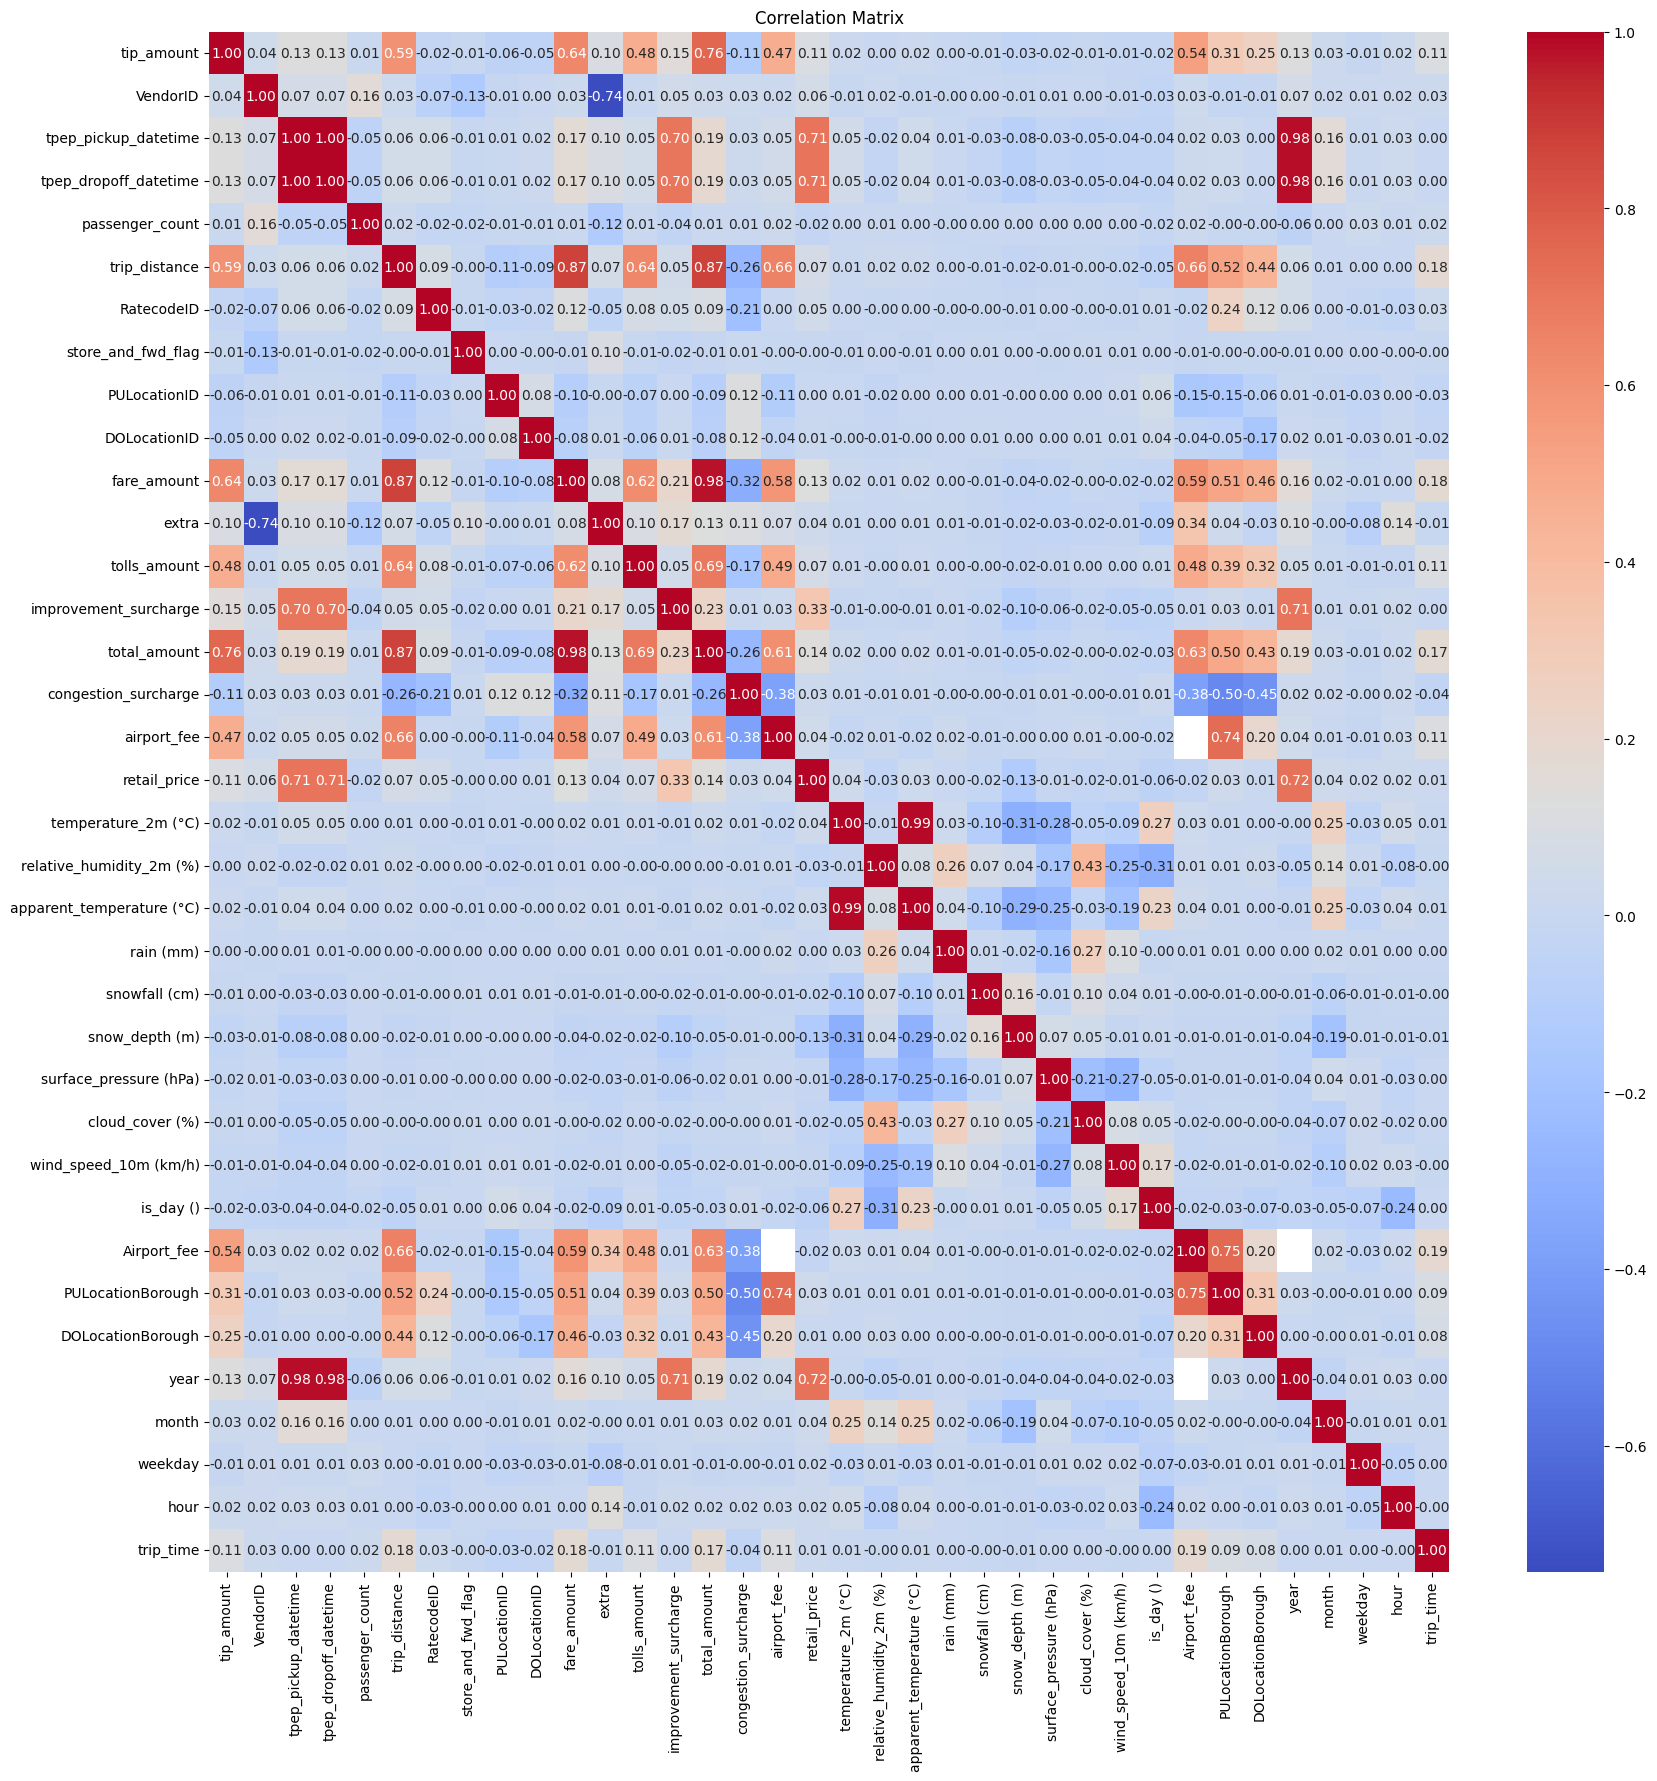

In [93]:
correlation_matrix = choosen_df_sel.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()